In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer


In [21]:
# Read the stock data from CSV file
stock_data = pd.read_csv("D:\\CIT\\SEM-IV\\Predictive Analytics Project\\Microsoft Stock data.csv")
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2000,58.68750,59.3125,56.00000,58.28125,36.827526,53228400
1,04-01-2000,56.78125,58.5625,56.12500,56.31250,35.583496,54119000
2,05-01-2000,55.56250,58.1875,54.68750,56.90625,35.958683,64059600
3,06-01-2000,56.09375,56.9375,54.18750,55.00000,34.754131,54976600
4,07-01-2000,54.31250,56.1250,53.65625,55.71875,35.208309,62013600


# DATA PRE-PROCESSING

In [23]:
# Print summary statistics of the stock data
print(stock_data.describe())

              Open         High          Low        Close    Adj Close  \
count  5536.000000  5536.000000  5536.000000  5536.000000  5536.000000   
mean     59.773141    60.376303    59.167282    59.793526    53.280545   
std      63.337446    63.907661    62.759767    63.387158    65.130504   
min      15.200000    15.620000    14.870000    15.150000    11.487970   
25%      26.820000    27.100000    26.530001    26.840000    19.074556   
50%      30.755000    31.085000    30.475000    30.780001    22.662973   
75%      55.985000    56.630001    55.432500    55.940625    50.500173   
max     344.619995   349.670013   342.200012   343.109985   342.402008   

             Volume  
count  5.536000e+03  
mean   5.319225e+07  
std    3.118415e+07  
min    7.425600e+06  
25%    3.058150e+07  
50%    4.848960e+07  
75%    6.671855e+07  
max    5.910522e+08  


In [24]:
#Checking for repeated values
stock_data=stock_data.drop_duplicates()
        stock_data[stock_data.duplicated()]

,Date,Open,High,Low,Close,Adj Close,Volume


In [25]:
#Null Values Check
stock_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [26]:
# Splitting the data
np.random.seed(1234)
split = np.random.rand(len(stock_data)) < 0.90
training_set = stock_data[split]
test_set = stock_data[~split]
training_set.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2000,58.68750,59.3125,56.00000,58.28125,36.827526,53228400
1,04-01-2000,56.78125,58.5625,56.12500,56.31250,35.583496,54119000
2,05-01-2000,55.56250,58.1875,54.68750,56.90625,35.958683,64059600
3,06-01-2000,56.09375,56.9375,54.18750,55.00000,34.754131,54976600
4,07-01-2000,54.31250,56.1250,53.65625,55.71875,35.208309,62013600


# PRINCIPAL COMPONENT ANALYSIS

In [27]:
pca = PCA(n_components=4)
pca.fit(training_set.iloc[:, 2:7])
pca_data = pca.transform(training_set.iloc[:, 2:7])

# Print the results of PCA
print(pca_data)

[[ 2.04439261e+05 -1.14906000e+01  1.24823097e+01  1.18335461e+00]
 [ 1.09503926e+06 -1.19255616e+01  1.28221660e+01  6.77581701e-01]
 [ 1.10356393e+07  4.31660281e+00  1.18667280e+01  1.25978508e+00]
 ...
 [-3.73624607e+07  5.03457544e+02  1.81715428e+00 -2.10855557e+00]
 [-3.70294607e+07  5.00996907e+02  2.30773887e+00 -1.46712796e+00]
 [-3.50231607e+07  4.97989347e+02  1.95365052e+00 -2.01981136e+00]]


Plotting of PCA components

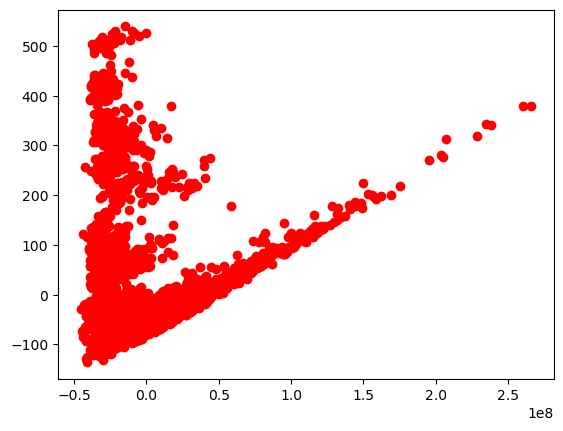

In [28]:
# Plot the principal components
plt.scatter(pca_data[:, 0], pca_data[:, 1],color='red')
plt.show()

# ARIMA FORECASTING

In [29]:
#Fitting the model with Close value of stock
arima_model = ARIMA(stock_data['Close'], order=(1, 1, 1))
arima_model_fit = arima_model.fit()

In [30]:
#Predicting the close value for the next 10 days
prediction = arima_model_fit.forecast(steps=10)
print(prediction)

5536    336.810922
5537    336.664076
5538    336.708002
5539    336.694863
5540    336.698793
5541    336.697617
5542    336.697969
5543    336.697864
5544    336.697895
5545    336.697886
Name: predicted_mean, dtype: float64


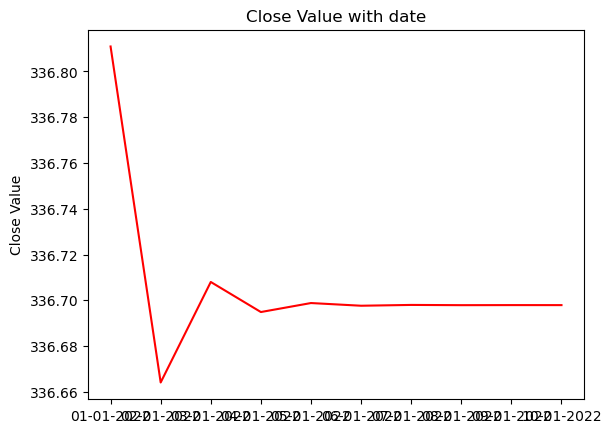

In [31]:
plt.plot(["01-01-2022","02-01-2022","03-01-2022","04-01-2022","05-01-2022","06-01-2022","07-01-2022","08-01-2022","09-01-2022","10-01-2022"],prediction, color='red')
plt.ylabel("Close Value")
plt.title("Close Value with date")
plt.show()

# CLUSTERING

    Find Optimum K-Value using Elbow Method

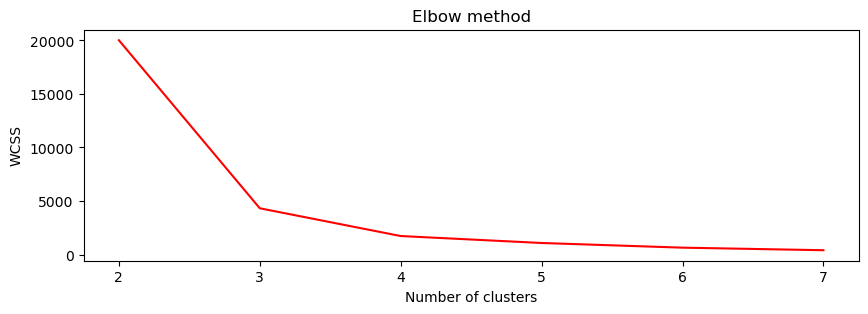

In [32]:
from sklearn.preprocessing import StandardScaler
# Select the features that you want to cluster on
features = ['Open', 'High', 'Low', 'Close']
X_scaled =StandardScaler().fit_transform(training_set[features])
#Elbow Method
w = []
for k in range(1,7):
    km = KMeans(n_clusters=k, random_state=0, n_init = 10)
    km.fit(X_scaled)
    w.append(km.inertia_)
plt.figure(figsize = (10 ,3))
plt.plot(range(2, 8),w,color='red')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow method")
plt.show()

INFERENCE:
    From the above plot, we can see that the value of wcss is showing a tragic downfall from to 2 to 3. In other cases, there is a straight line curve. So the optimum number of clusters is 3 i.e., k=3.

# K-Means Algorithm For Clustering

In [33]:
# Perform k-means clustering on the stock data
k=3
kmodel = KMeans(n_clusters=k, random_state=0,n_init=10)
kmodel.fit(training_set[features])
print(kmodel.labels_)


[0 0 0 ... 1 1 1]


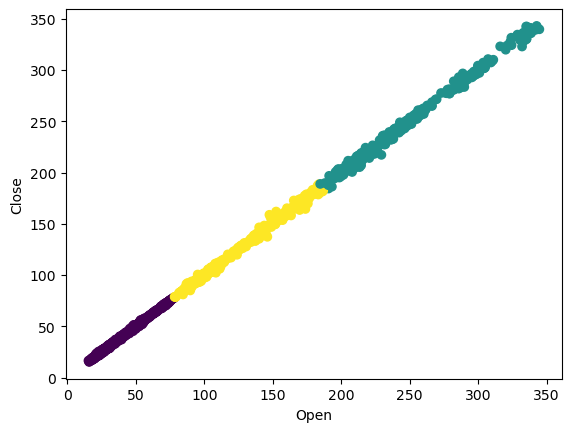

In [34]:
plt.scatter(training_set['Open'], training_set['Close'], c=kmodel.labels_)
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()


In [35]:
#Classifying the test set into clusters
c_test=kmodel.predict(test_set[features])
print(test_set)

            Date        Open        High         Low       Close   Adj Close  \
8     13-01-2000   52.187500   54.312500   50.750000   53.906250   34.062992   
24    07-02-2000   53.406250   53.437500   52.125000   53.312500   33.687809   
37    25-02-2000   47.343750   47.351563   45.250000   45.656250   28.849871   
39    29-02-2000   45.875000   45.875000   44.437500   44.687500   28.237743   
55    22-03-2000   51.406250   52.812500   50.562500   51.625000   32.621487   
...          ...         ...         ...         ...         ...         ...   
5481  14-10-2021  299.209991  303.269989  297.829987  302.750000  301.573547   
5517  06-12-2021  323.950012  327.450012  319.230011  326.190002  325.516937   
5525  16-12-2021  335.709991  336.760010  323.019989  324.899994  324.229584   
5530  23-12-2021  332.750000  336.390015  332.730011  334.690002  333.999390   
5533  29-12-2021  341.299988  344.299988  339.679993  341.950012  341.244415   

        Volume  
8     83144000  
24   

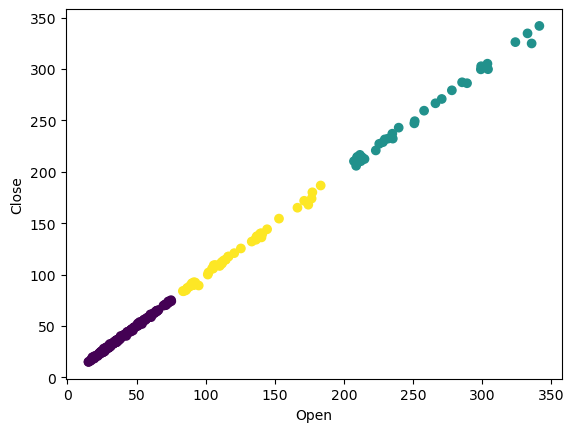

In [36]:
plt.scatter(test_set['Open'], test_set['Close'], c=c_test)
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

INFERENCE:
    From the plot, we find that most of the data in the test set fall in the 0th cluster.

In [39]:
#Predicting the cluster for some random stock data
op=float(input("Enter open value:"))
cl=float(input("Enter close value:"))
hi=float(input("Enter high value:"))
lo=float(input("Enter low value:"))

data=pd.DataFrame({'Open':[op],'Close':[cl],'High':[hi],
                                     'Low':[lo]})
cluster=kmodel.predict(data[features])

print("The given data will belong to cluster:",cluster[0])

Enter open value:89
Enter close value:120
Enter high value:145
Enter low value:78
The given data will belong to cluster: 2


# Discrimination and Classification